**Productivity of Garment Employees**

Data Acquisition and Preparation

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('/content/garments_worker_productivity.csv')

In [3]:
print(data.head())

       date   quarter  department       day  team  targeted_productivity  \
0  1/1/2015  Quarter1      sweing  Thursday     8                   0.80   
1  1/1/2015  Quarter1  finishing   Thursday     1                   0.75   
2  1/1/2015  Quarter1      sweing  Thursday    11                   0.80   
3  1/1/2015  Quarter1      sweing  Thursday    12                   0.80   
4  1/1/2015  Quarter1      sweing  Thursday     6                   0.80   

     smv     wip  over_time  incentive  idle_time  idle_men  \
0  26.16  1108.0       7080         98        0.0         0   
1   3.94     NaN        960          0        0.0         0   
2  11.41   968.0       3660         50        0.0         0   
3  11.41   968.0       3660         50        0.0         0   
4  25.90  1170.0       1920         50        0.0         0   

   no_of_style_change  no_of_workers  actual_productivity  
0                   0           59.0             0.940725  
1                   0            8.0        

In [4]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    691 non-null    float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 non-null   float64
dtypes: f

In [5]:
print(data.isnull().sum())

date                       0
quarter                    0
department                 0
day                        0
team                       0
targeted_productivity      0
smv                        0
wip                      506
over_time                  0
incentive                  0
idle_time                  0
idle_men                   0
no_of_style_change         0
no_of_workers              0
actual_productivity        0
dtype: int64


In [6]:
print(data.describe())

              team  targeted_productivity          smv           wip  \
count  1197.000000            1197.000000  1197.000000    691.000000   
mean      6.426901               0.729632    15.062172   1190.465991   
std       3.463963               0.097891    10.943219   1837.455001   
min       1.000000               0.070000     2.900000      7.000000   
25%       3.000000               0.700000     3.940000    774.500000   
50%       6.000000               0.750000    15.260000   1039.000000   
75%       9.000000               0.800000    24.260000   1252.500000   
max      12.000000               0.800000    54.560000  23122.000000   

          over_time    incentive    idle_time     idle_men  \
count   1197.000000  1197.000000  1197.000000  1197.000000   
mean    4567.460317    38.210526     0.730159     0.369256   
std     3348.823563   160.182643    12.709757     3.268987   
min        0.000000     0.000000     0.000000     0.000000   
25%     1440.000000     0.000000     0.00

EDA and Handling Missing Values

In [7]:
data = data.dropna()

In [8]:
print(data.isnull().sum())

date                     0
quarter                  0
department               0
day                      0
team                     0
targeted_productivity    0
smv                      0
wip                      0
over_time                0
incentive                0
idle_time                0
idle_men                 0
no_of_style_change       0
no_of_workers            0
actual_productivity      0
dtype: int64


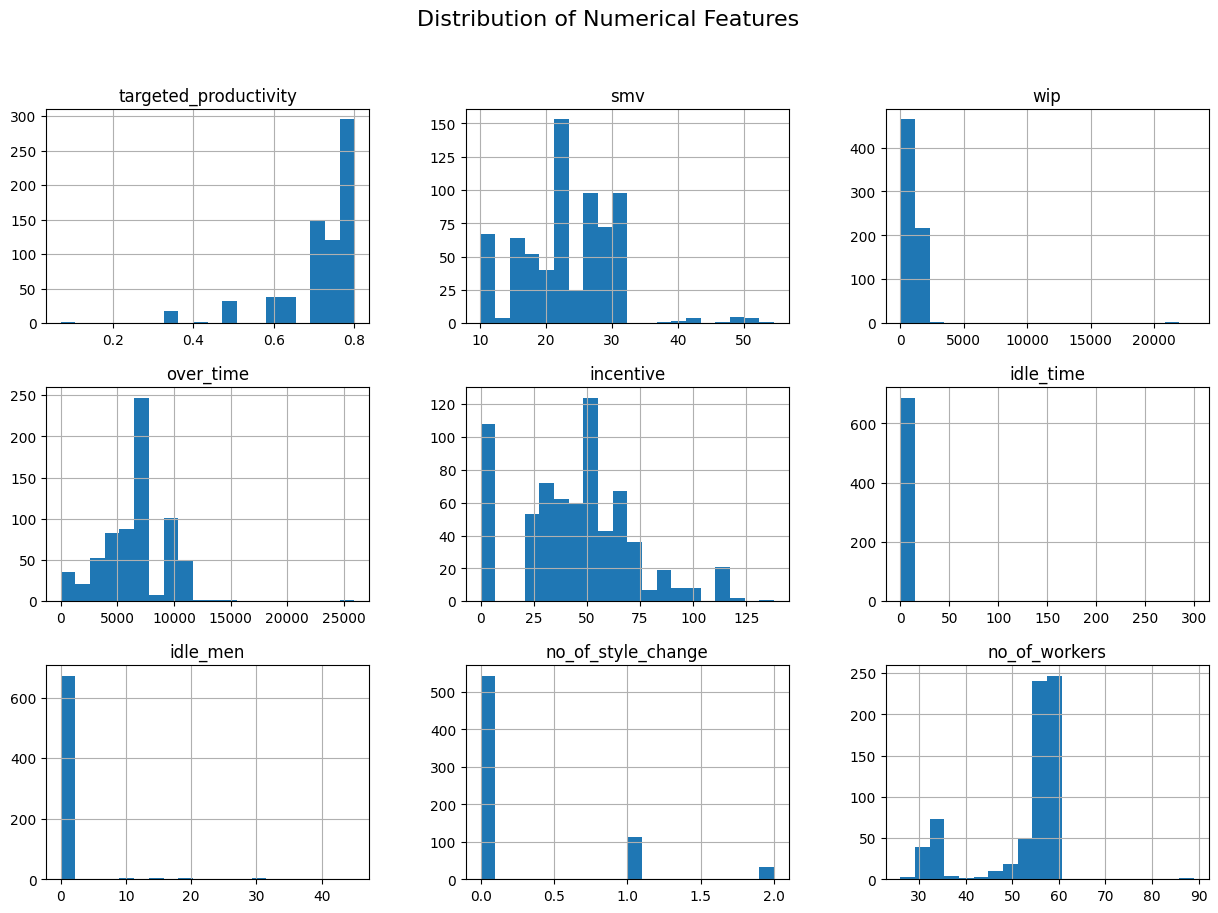

In [9]:
# Plot histograms for numerical columns
numerical_columns = ['targeted_productivity', 'smv', 'wip', 'over_time', 'incentive', 'idle_time', 'idle_men', 'no_of_style_change', 'no_of_workers']
data[numerical_columns].hist(figsize=(15, 10), bins=20)
plt.suptitle('Distribution of Numerical Features', fontsize=16)
plt.show()

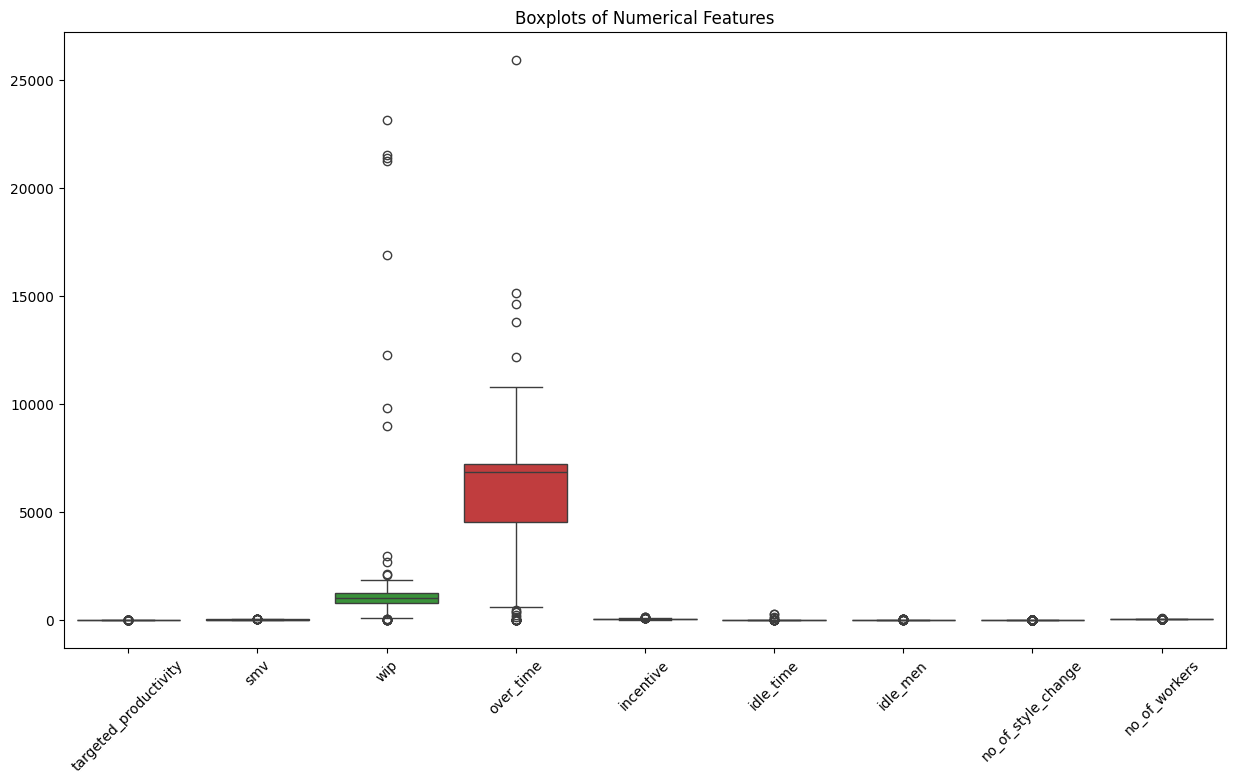

In [10]:
# Boxplots to visualize outliers
import seaborn as sns
plt.figure(figsize=(15, 8))
sns.boxplot(data=data[numerical_columns])
plt.title('Boxplots of Numerical Features')
plt.xticks(rotation=45)
plt.show()

In [11]:
data['date'] = pd.to_datetime(data['date'])

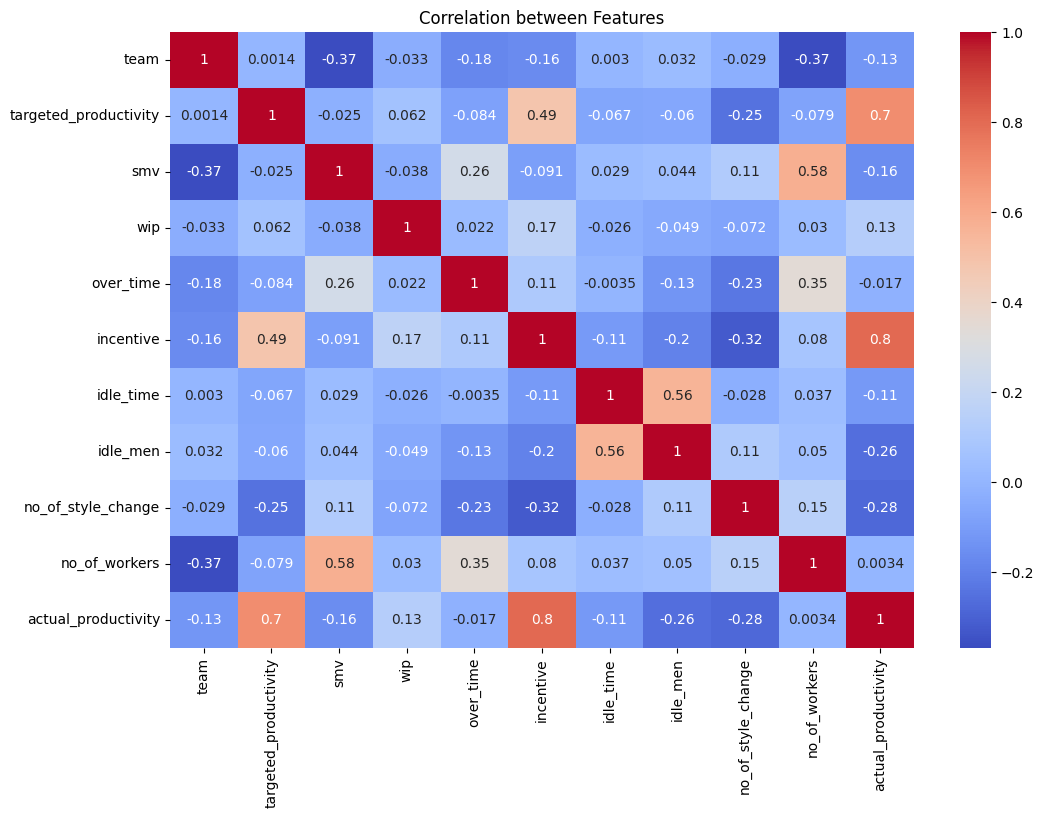

In [12]:
# Drop non-numeric columns (e.g., dates)
import numpy as np
data_numeric = data.select_dtypes(include=[np.number])

# Now you can create the correlation matrix
plt.figure(figsize=(12,8))
sns.heatmap(data_numeric.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation between Features')
plt.show()

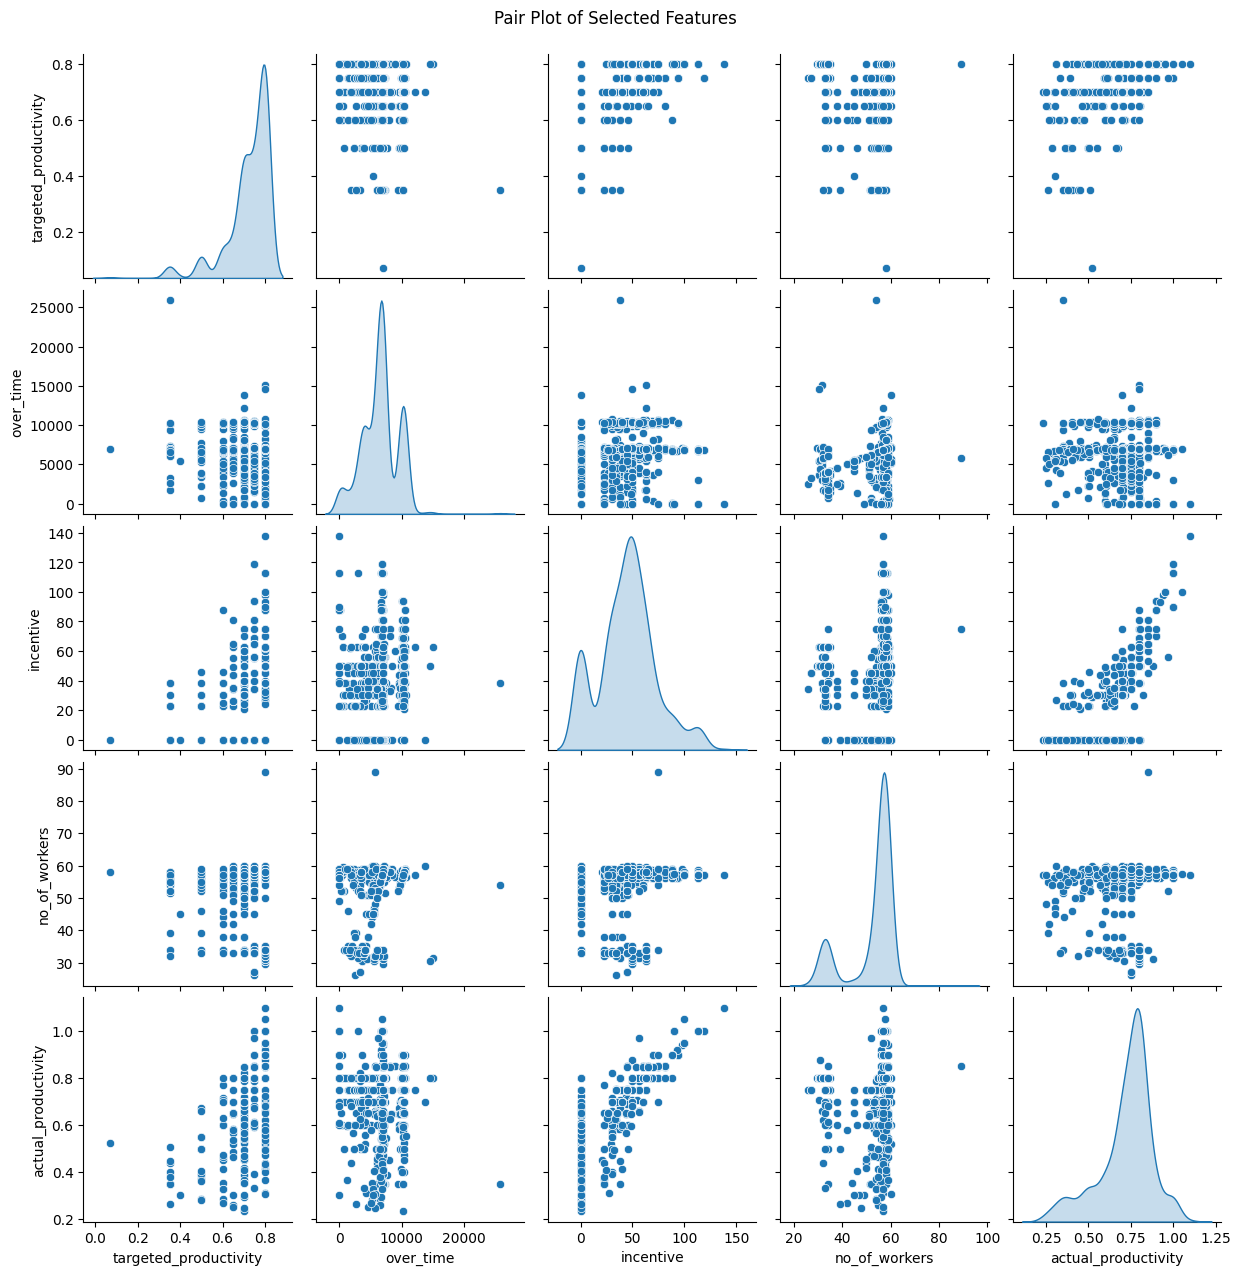

In [13]:
# Select key features for pairplot
features = ['targeted_productivity', 'over_time', 'incentive', 'no_of_workers', 'actual_productivity']

# Plot pairplot
sns.pairplot(data[features], diag_kind='kde')
plt.suptitle('Pair Plot of Selected Features', y=1.02)
plt.show()

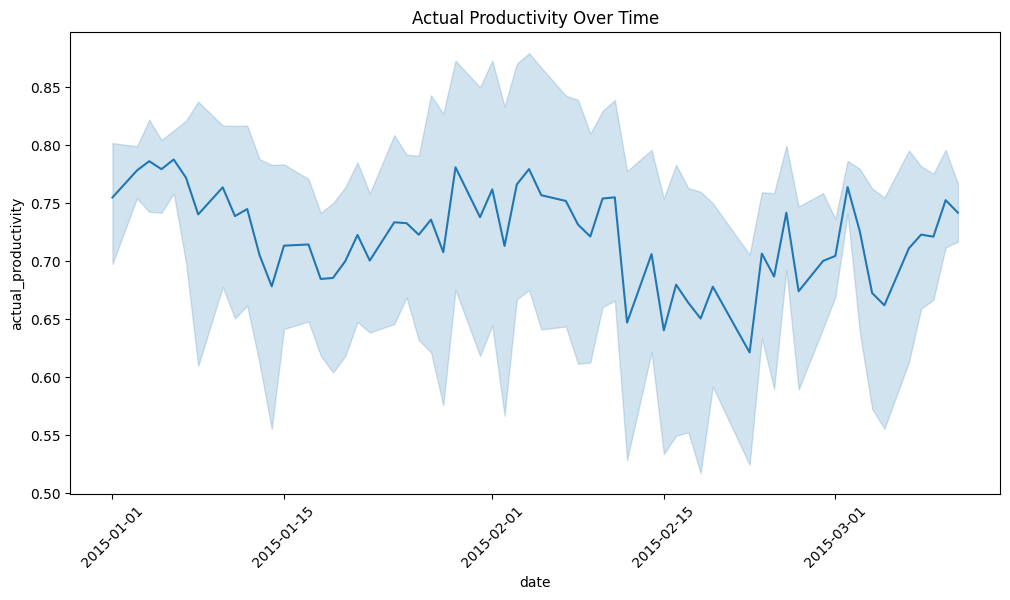

In [14]:
# Plot actual productivity over time
plt.figure(figsize=(12, 6))
sns.lineplot(x='date', y='actual_productivity', data=data)
plt.title('Actual Productivity Over Time')
plt.xticks(rotation=45)
plt.show()

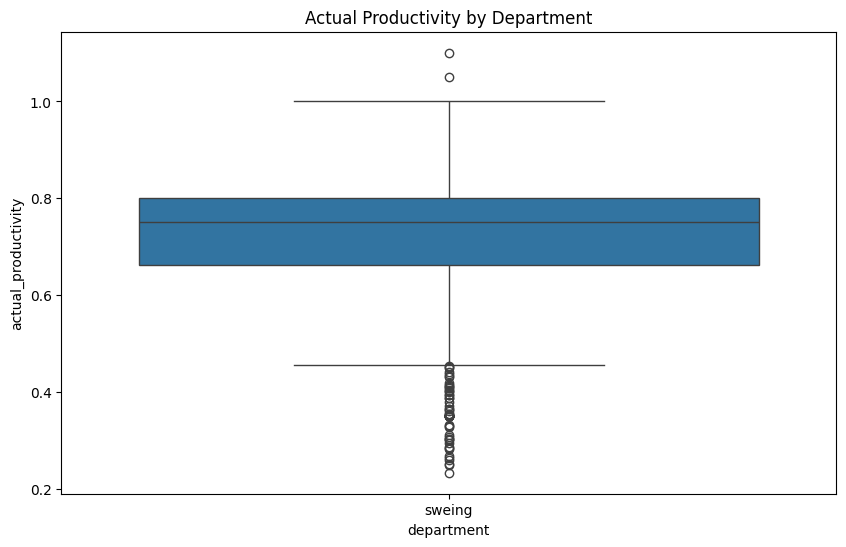

In [15]:
# Boxplot for department vs actual productivity
plt.figure(figsize=(10, 6))
sns.boxplot(x='department', y='actual_productivity', data=data)
plt.title('Actual Productivity by Department')
plt.show()

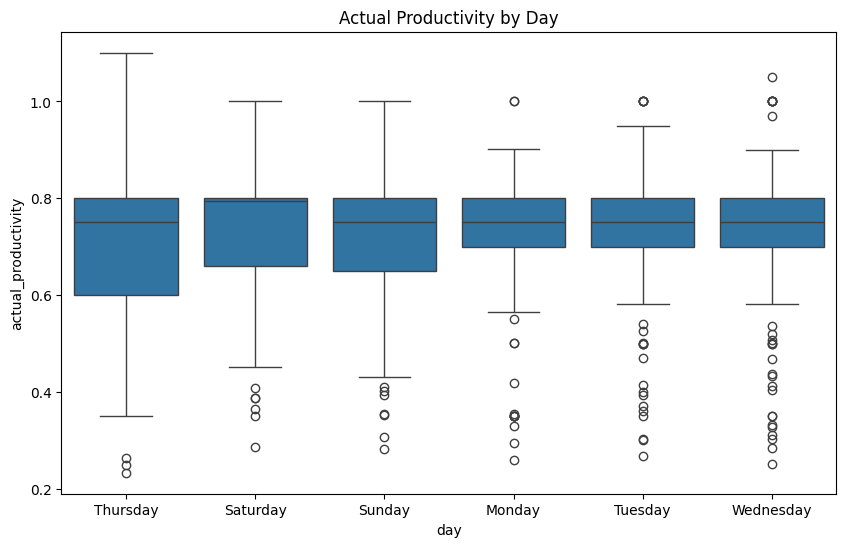

In [16]:
# Boxplot for day vs actual productivity
plt.figure(figsize=(10, 6))
sns.boxplot(x='day', y='actual_productivity', data=data)
plt.title('Actual Productivity by Day')
plt.show()

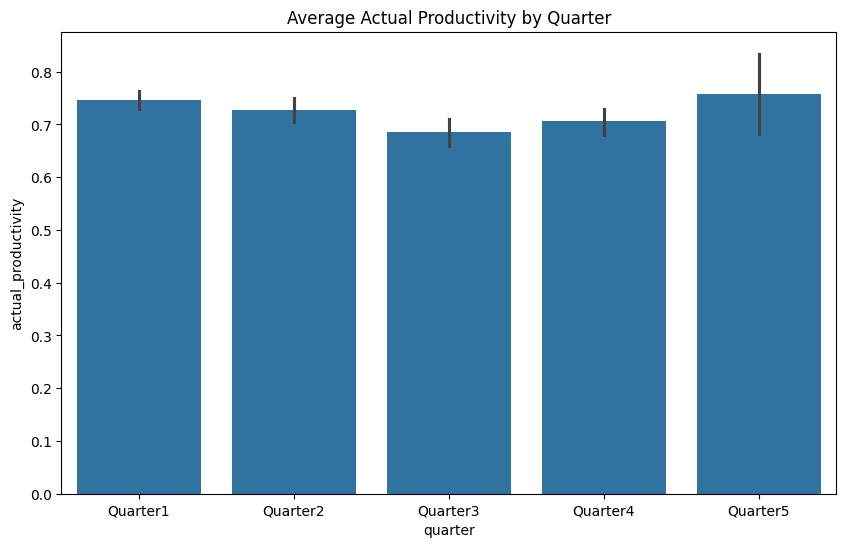

In [17]:
# Bar plot for quarter vs average actual productivity
plt.figure(figsize=(10, 6))
sns.barplot(x='quarter', y='actual_productivity', data=data, estimator=np.mean)
plt.title('Average Actual Productivity by Quarter')
plt.show()

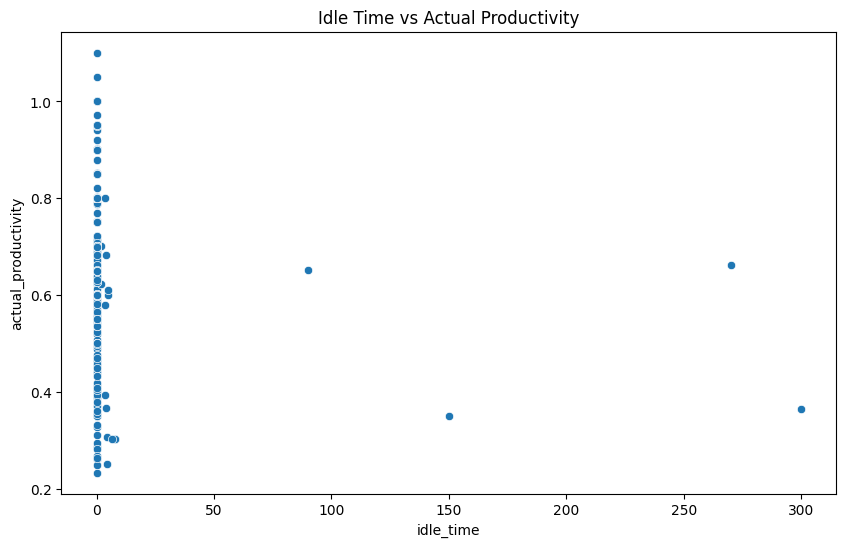

In [18]:
# Scatter plot: Idle time vs Actual productivity
plt.figure(figsize=(10, 6))
sns.scatterplot(x='idle_time', y='actual_productivity', data=data)
plt.title('Idle Time vs Actual Productivity')
plt.show()

Encoding Categorical Data

In [19]:
# One-hot encoding for categorical features
data_encoded = pd.get_dummies(data, columns=['quarter', 'department', 'day'], drop_first=True)

Feature Scaling

In [20]:
from sklearn.preprocessing import StandardScaler

# Drop unnecessary columns and separate target from features
X = data_encoded.drop(['date', 'actual_productivity'], axis=1)
y = data_encoded['actual_productivity']

# Apply Standard Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Data Splitting

In [21]:
from sklearn.model_selection import train_test_split

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

Model Building

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score

# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'SVR': SVR()
}

# Store the results
train_scores = []
test_scores = []

# Train each model and evaluate
for name, model in models.items():
    model.fit(X_train, y_train)

    # Training and testing predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Calculate R2 scores for training and testing sets
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)

    # Append the results
    train_scores.append(train_r2)
    test_scores.append(test_r2)

# Create a DataFrame for visualization
model_scores_df = pd.DataFrame({
    'Model': models.keys(),
    'Training R2 Score': train_scores,
    'Testing R2 Score': test_scores
})

# Display the DataFrame
print(model_scores_df)

               Model  Training R2 Score  Testing R2 Score
0  Linear Regression           0.806771          0.801230
1      Decision Tree           1.000000          0.606880
2      Random Forest           0.975053          0.830302
3  Gradient Boosting           0.943495          0.849127
4                SVR           0.834237          0.655470


Model Comparison and Selection

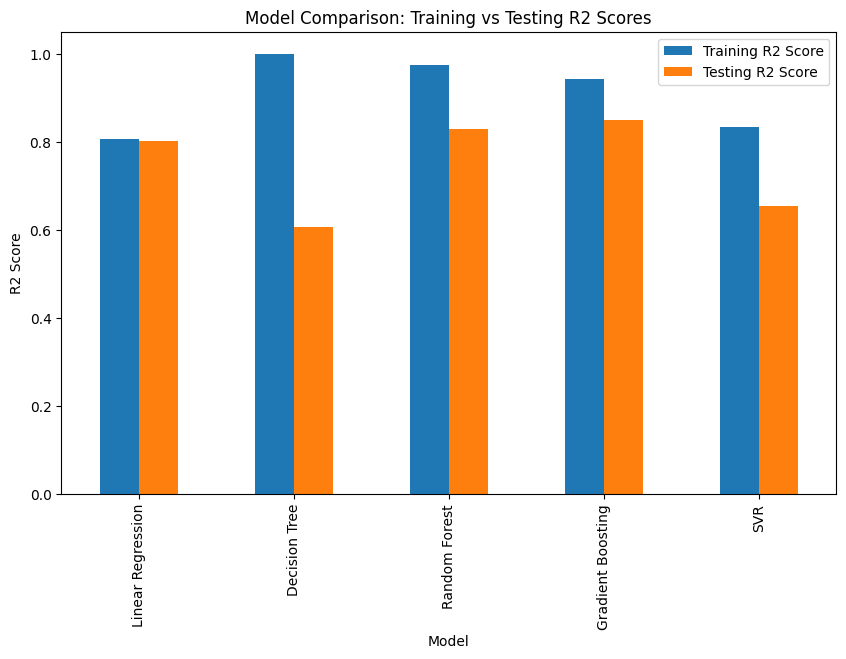

In [23]:
import matplotlib.pyplot as plt

# Plot a bar chart of training and testing accuracy for model comparison
model_scores_df.set_index('Model')[['Training R2 Score', 'Testing R2 Score']].plot(kind='bar', figsize=(10,6))
plt.title('Model Comparison: Training vs Testing R2 Scores')
plt.ylabel('R2 Score')
plt.show()

Model Training and Evaluation

In [24]:
# Select the best model (Random Forest based on Testing R2 Score)
best_model = RandomForestRegressor(random_state=42)
best_model.fit(X_train, y_train)

# Make predictions on the test set
y_test_pred_best = best_model.predict(X_test)

# Evaluate the model using R² score
r2_score_best = r2_score(y_test, y_test_pred_best)

# Print the R² score for the selected Random Forest model
print(f'Best Model (Random Forest) R² Score on Test Set: {r2_score_best}')

Best Model (Random Forest) R² Score on Test Set: 0.8303016770001376


In [25]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Train the Random Forest Regressor on the training set
best_model = RandomForestRegressor(random_state=42)
best_model.fit(X_train, y_train)

# Make predictions on the test set
y_test_pred_best = best_model.predict(X_test)

# Evaluate the model using R² score
r2_score_best = r2_score(y_test, y_test_pred_best)

# Calculate additional regression metrics
mae = mean_absolute_error(y_test, y_test_pred_best)
mse = mean_squared_error(y_test, y_test_pred_best)
rmse = mse ** 0.5

# Print the evaluation metrics
print(f'R² Score: {r2_score_best}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')

R² Score: 0.8303016770001376
Mean Absolute Error (MAE): 0.032840242063812905
Mean Squared Error (MSE): 0.00352912236860291
Root Mean Squared Error (RMSE): 0.05940641689752808
